# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('Data/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [19]:
data.shape
data.dropna()
data[data.duplicated()]
for column in data.columns:
  print(type(column))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [4]:
lis = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
chars_to_remove = [',', '$']

for i in lis:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[i] = data[i].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[i] = pd.to_numeric(data[i])
    #note- using dot format like data.i will result in error as it will not recognise i as a valid type
data

<ipython-input-4-cae864f6edc4>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[i] = data[i].astype(str).str.replace(char, "")


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [67]:
# for i in range(len(data['Release_Date'])):
#   data['Release_Date'][i] = dt.strftime(data['Release_Date'][i], '%mm %dd %yyyy')
# data
data.Release_Date = pd.to_datetime(data.Release_Date)
data
type(data['Release_Date'][0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5382
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5034 non-null   int64         
 1   Release_Date           5034 non-null   datetime64[ns]
 2   Movie_Title            5034 non-null   object        
 3   USD_Production_Budget  5034 non-null   int64         
 4   USD_Worldwide_Gross    5034 non-null   int64         
 5   USD_Domestic_Gross     5034 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 404.3+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [5]:
data.USD_Production_Budget.mean(), data.USD_Worldwide_Gross.mean()
# for i in range(len(data['USD_Production_Budget'])):
# data.drop(index=data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross == 0)]) error method
# data
partial_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
partial_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,2/16/1956,Carousel,3380000,3220,0
1579,5087,2/11/2001,Everything Put Together,500000,7890,0
1744,3695,12/31/2001,The Hole,7500000,10834406,0
2155,4236,12/31/2003,Nothing,4000000,63180,0
2203,2513,3/31/2004,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,4/14/2017,Queen of the Desert,36000000,1480089,0
5348,2225,5/5/2017,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,7/3/2017,Departure,1100000,27561,0
5372,1856,8/25/2017,Ballerina,30000000,48048527,0


In [6]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross == 0')
print(f'Number of international releases: {len(international_releases)}')
for i in international_releases.index:
  data.drop(index=i, inplace=True)
data

Number of international releases: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
5,4250,12/30/1925,Ben-Hur,3900000,9000000,9000000
...,...,...,...,...,...,...
5378,914,10/2/2017,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,10/2/2017,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,10/3/2017,Kong: Skull Island,185000000,561137727,168052812
5381,94,12/5/2017,King Arthur: Legend of the Sword,175000000,140012608,39175066


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [24]:
partial_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [32]:
data.sort_values('USD_Worldwide_Gross',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547
...,...,...,...,...,...,...
839,5379,1996-01-04,Bang,10000,527,527
4772,5005,2014-12-31,Destiny,750000,450,0
2528,5135,2005-10-13,The Dark Hours,400000,423,423
3198,5380,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [36]:
money_losing = data.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data.shape[0]*100

32.91617004370282

# Seaborn for Data Viz: Bubble Charts

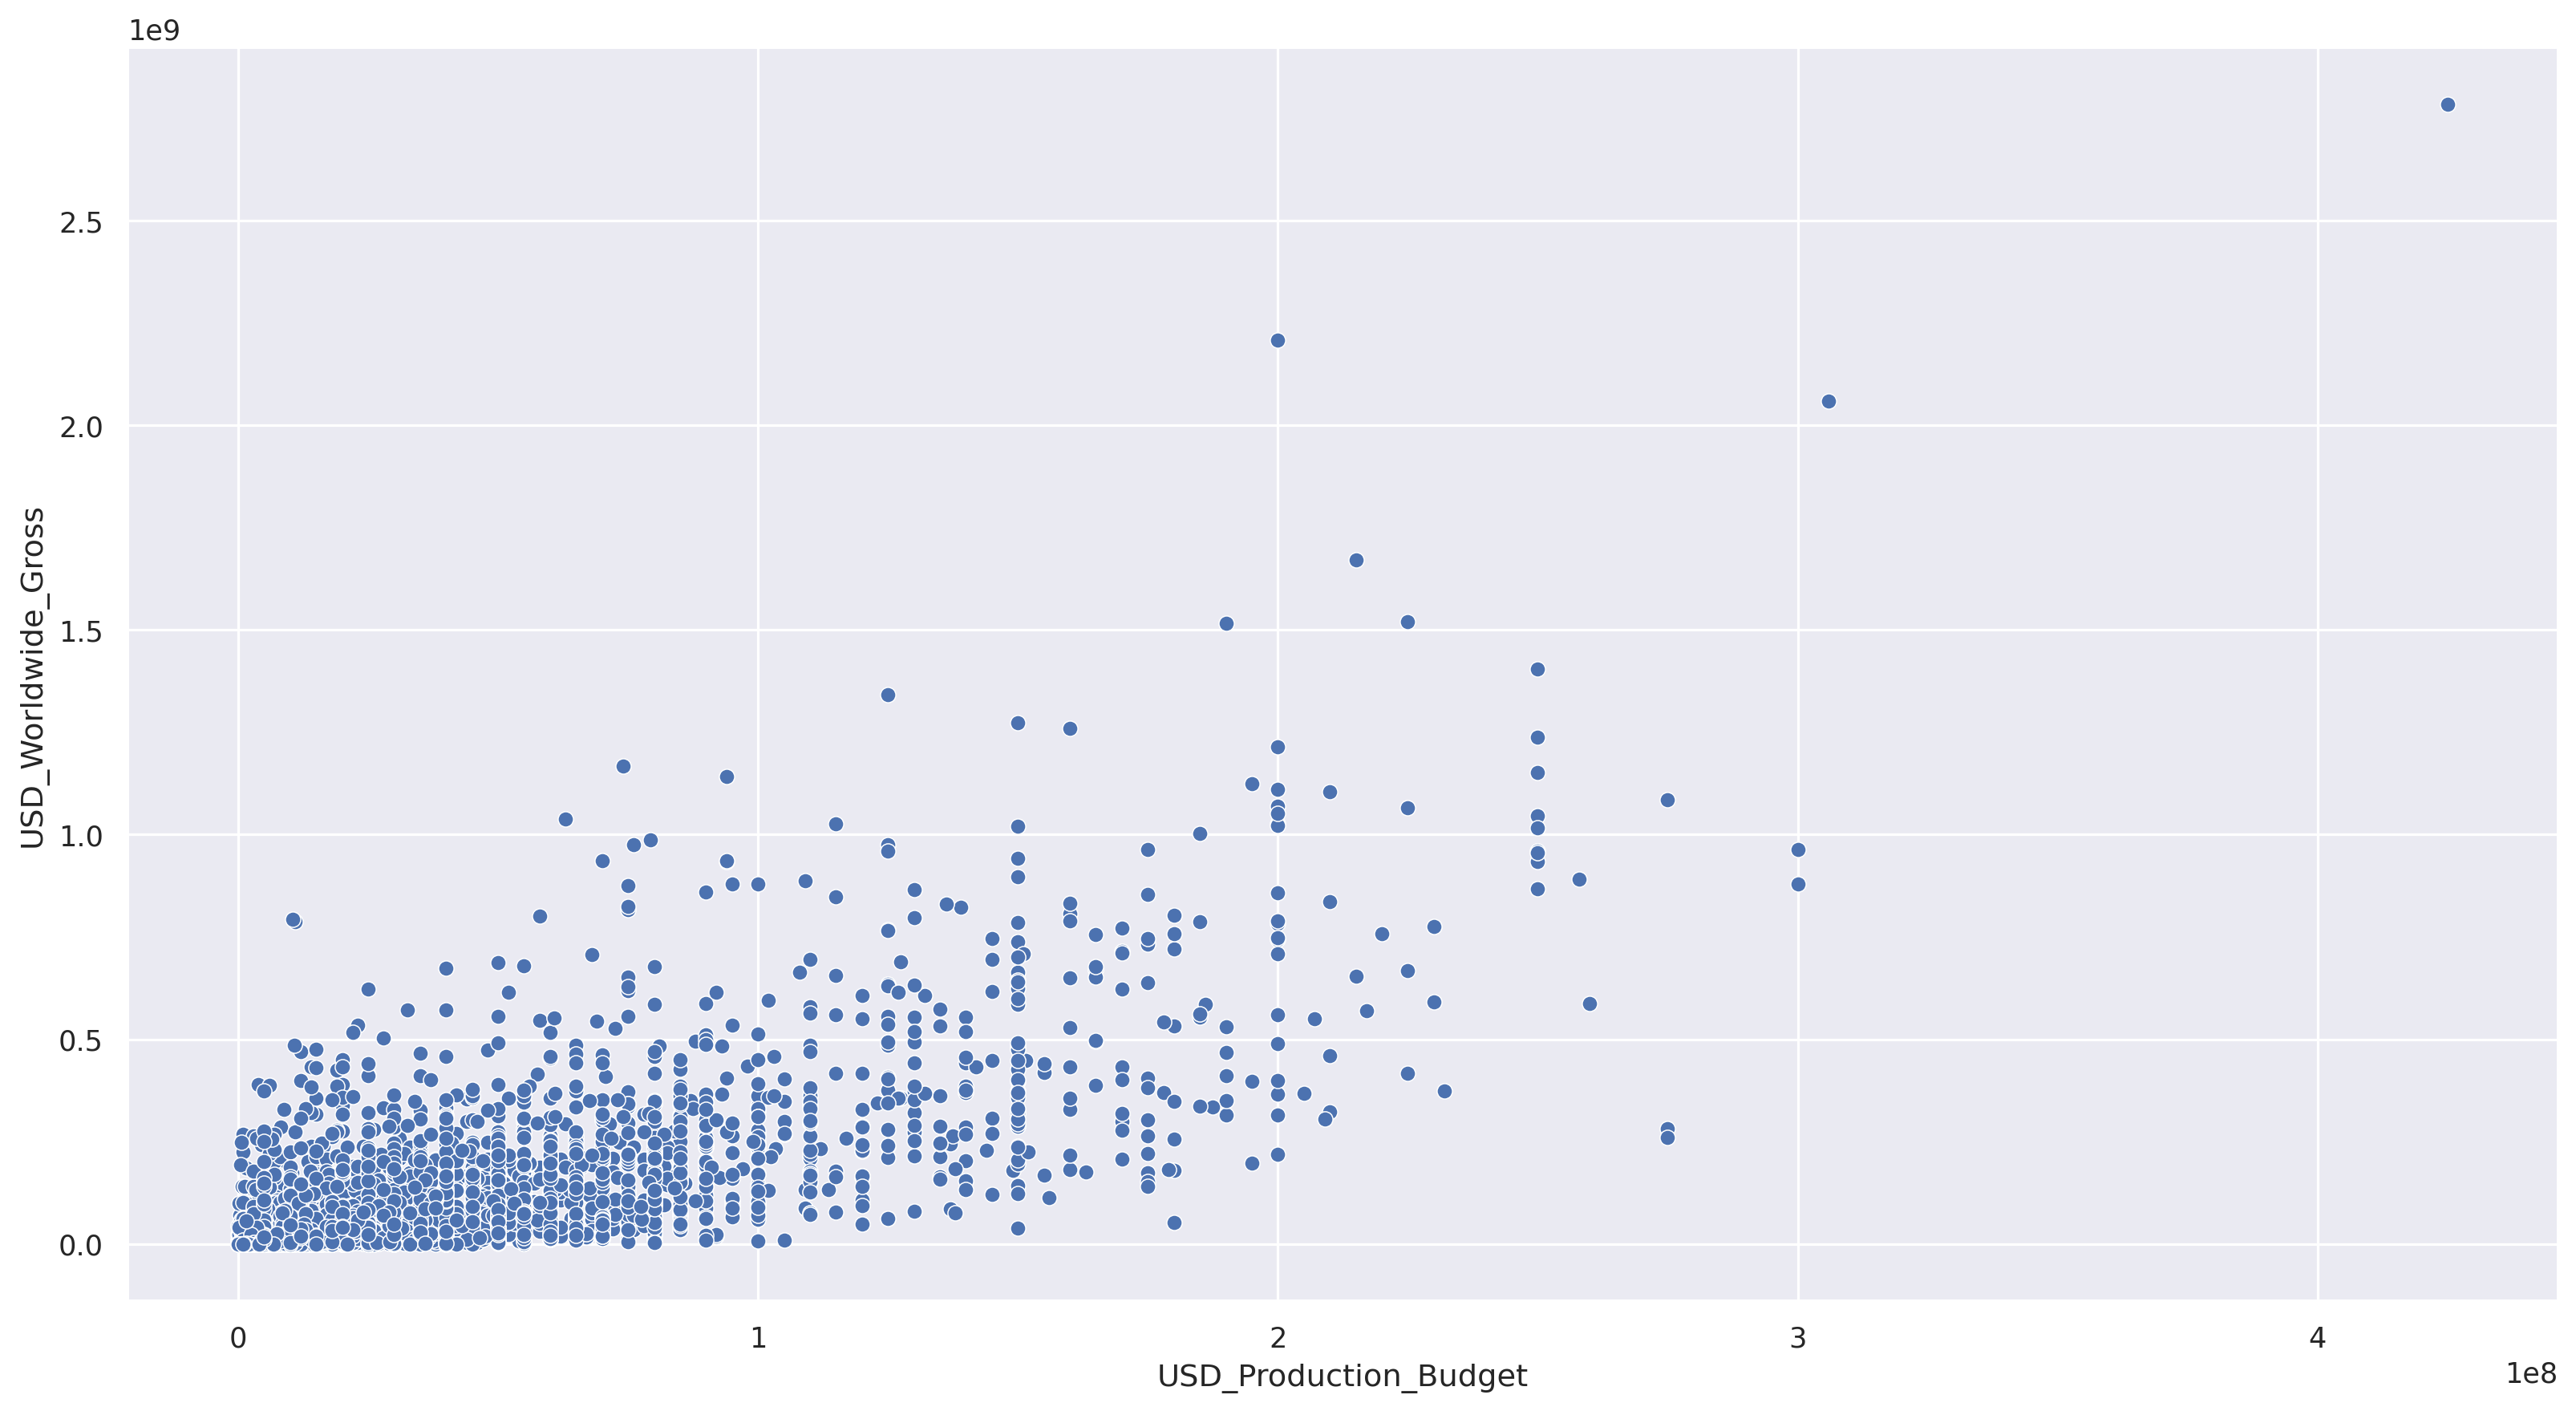

In [42]:
plt.figure(figsize=(17,9), dpi=230)
sns.set_theme()
sns.scatterplot(data=data,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')
plt.show()

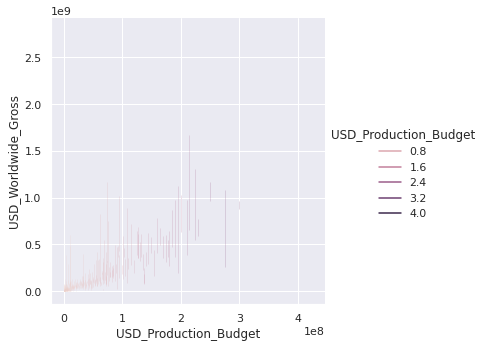

In [65]:
sns.relplot(
    data=data, kind="line",
    x="USD_Production_Budget", y="USD_Worldwide_Gross", hue='USD_Production_Budget'
)

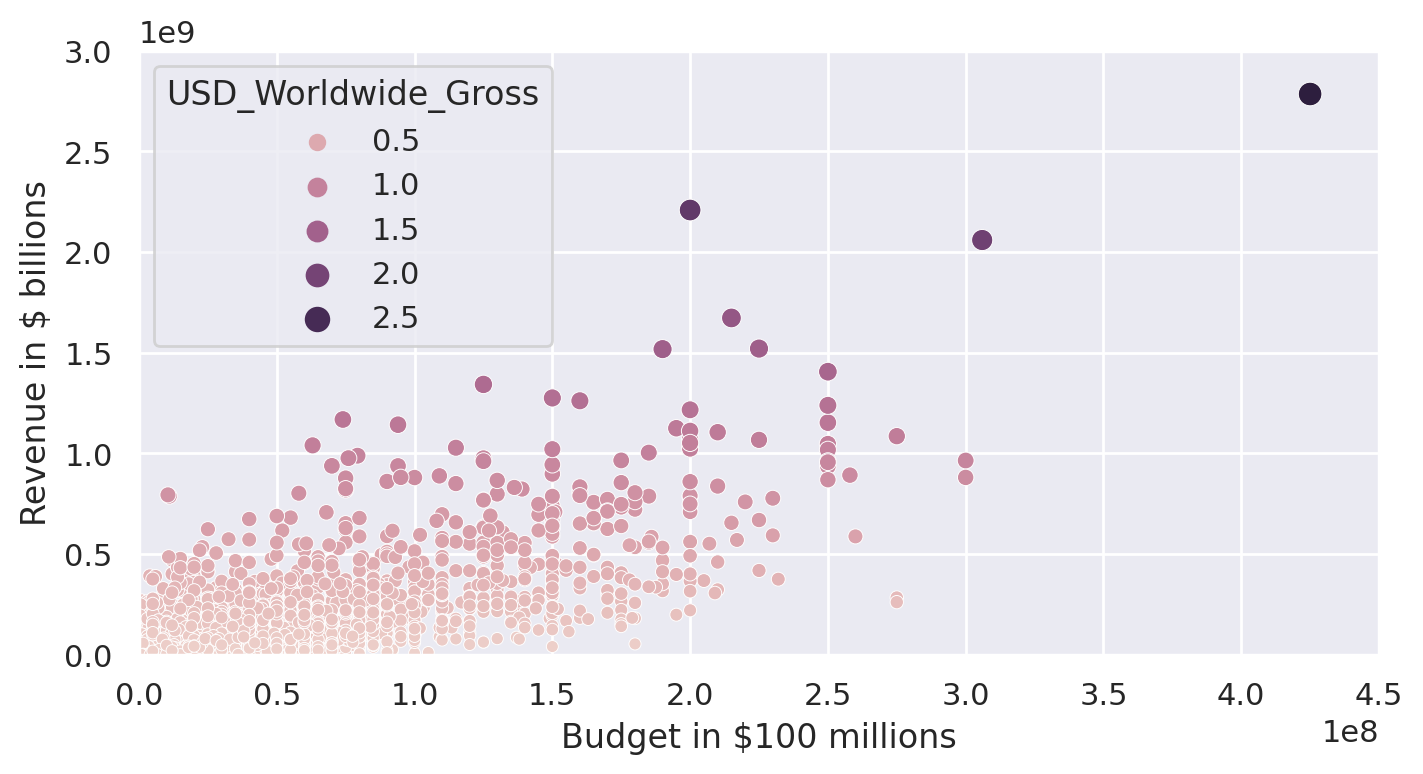

In [59]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):    #other parameters could be whitegrid,dark or ticks
  ax = sns.scatterplot(data=data,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



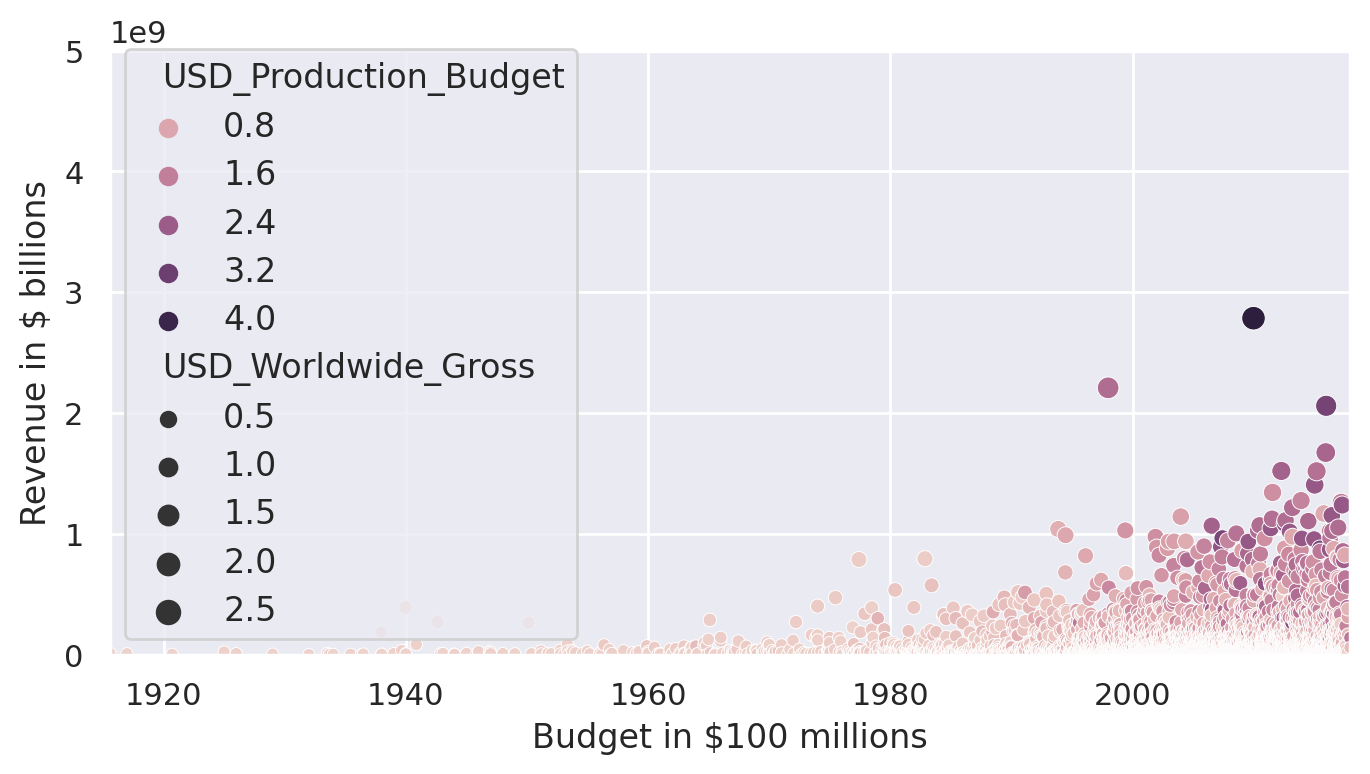

In [73]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):    #other parameters could be whitegrid,dark or ticks
  ax = sns.scatterplot(data=data,
                       x='Release_Date', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Production_Budget',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 5000000000),
        xlim=(data.Release_Date.min(),data.Release_Date.max() ),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [7]:
decade =[]
dates = pd.DatetimeIndex(data=data.Release_Date)
dates.year
for i in dates.year:
  decade.append((i//10)*10)
data['Decade'] = decade
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000,1910
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000,1920
5,4250,12/30/1925,Ben-Hur,3900000,9000000,9000000,1920
...,...,...,...,...,...,...,...
5378,914,10/2/2017,Fifty Shades Darker,55000000,376856949,114434010,2010
5379,1295,10/2/2017,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,10/3/2017,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,12/5/2017,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [10]:
old_films = data.query('Decade<1970')
old_films.USD_Production_Budget.max()

42000000

In [9]:
new_films = data.query('Decade>=1970')
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
154,2270,1/1/1970,Darling Lili,22000000,5000000,5000000,1970
155,3136,1/1/1970,Patton,12000000,62500000,62500000,1970
156,3277,1/1/1970,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1/1/1970,M*A*S*H,3500000,81600000,81600000,1970
158,4855,1/1/1970,Beyond the Valley of the Dolls,1000000,9000000,9000000,1970
...,...,...,...,...,...,...,...
5378,914,10/2/2017,Fifty Shades Darker,55000000,376856949,114434010,2010
5379,1295,10/2/2017,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,10/3/2017,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,12/5/2017,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010


# Seaborn Regression Plots

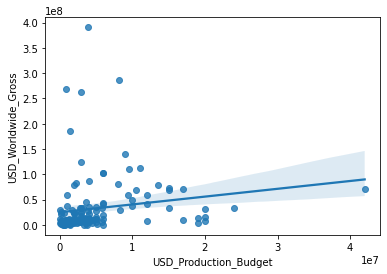

In [12]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

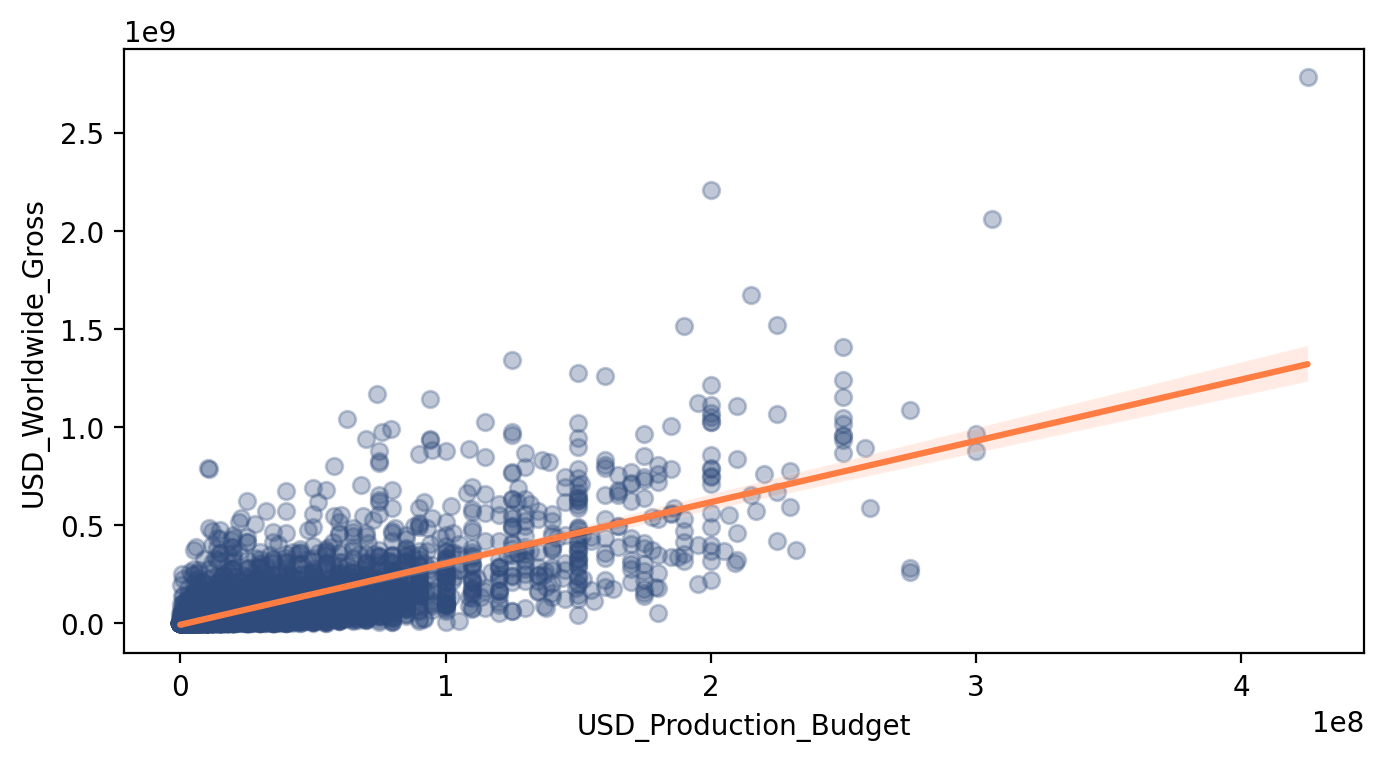

In [19]:
plt.figure(figsize=(8,4), dpi=200)
# plt.xlim(0, data.USD_Production_Budget.max())
# plt.ylim(0, data.USD_Worldwide_Gross.max())
plt.xlabel('Budget in $ millions')
plt.ylabel('Revenue in $ millions')
with sns.axes_style("darkgrid"):
  sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [22]:
regression = LinearRegression()

In [32]:
x = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])   # replace new_films with old_films, but that model is inaccurate and its regression.score reflects the same, being 2% 
regression.fit(x,y)
regression.intercept_, regression.coef_

(array([-8413425.12256294]), array([[3.12475368]]))

In [34]:
regression.score(x,y)

0.550189263647911

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [35]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350m film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350m film is around $1.085e+09.
